In [1]:
import pandas as pd
import lightkurve as lk 
import matplotlib.pyplot as plt
import numpy as np

%run pipeline.ipynb

import warnings
warnings.filterwarnings("ignore")

In [2]:
id_table=pd.read_csv('makingtable/idswithdiscopaper.csv')
lclist=pd.read_csv('amplitudetable.csv')

In [3]:
#merged=pd.merge(lclist,id_table,on='pop_id',how='left')

In [4]:
#merged['calc_per']=0

In [5]:
# for index, currow in merged.iterrows():
#     if currow['calc_per']!=0:
#         continue
#     try:
#         lc=get_lc_string(currow['lcname'])
#         period = lc.to_periodogram(maximum_period=5).period_at_max_power.value
#         merged.at[index,'calc_per']=period
#     except Exception as e:
#         print(f'Error processing {currow['lcname']}: {e}')

In [6]:
#merged.sort_values(by='pop_id',inplace=True,ignore_index=True)

In [7]:
#merged.to_csv('periodtable.csv',index=False)

In [8]:
merged=pd.read_csv('periodtable.csv')
merged

,pop_id,lcname,idtype,ID,secorcamp,author_x,cadence,fluxamplitude,TIC,gaiadr3_source_id,epic_id,per,per2,group,age_Myr,disco_paper,author_y,year,calc_per
0,0,TIC-59129133-5-FFI-30min,TIC,59129133,5,FFI,30min,0.041935,59129133,3.392549e+18,246676629.0,0.6253,0.6332,Taurus,2.0,Stauffer_2018,Stauffer,2018,0.627144
1,0,EPIC-246676629-13-EVEREST-1800,EPIC,246676629,13,EVEREST,1800,0.075449,59129133,3.392549e+18,246676629.0,0.6253,0.6332,Taurus,2.0,Stauffer_2018,Stauffer,2018,0.625911
2,0,TIC-59129133-71-FFI-200s,TIC,59129133,71,FFI,200s,0.049836,59129133,3.392549e+18,246676629.0,0.6253,0.6332,Taurus,2.0,Stauffer_2018,Stauffer,2018,0.625700
3,0,EPIC-246676629-13-K2SFF-1800,EPIC,246676629,13,K2SFF,1800,0.083411,59129133,3.392549e+18,246676629.0,0.6253,0.6332,Taurus,2.0,Stauffer_2018,Stauffer,2018,0.625212
4,0,TIC-59129133-43-SPOC-120,TIC,59129133,43,SPOC,120,0.053993,59129133,3.392549e+18,246676629.0,0.6253,0.6332,Taurus,2.0,Stauffer_2018,Stauffer,2018,0.626965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,211,TIC-268324578-44-SPOC-120,TIC,268324578,44,SPOC,120,0.122678,268324578,1.477992e+17,247794636.0,1.7211,2.6225,Taurus,2.0,Rebull_2020,Rebull,2020,2.221296
980,211,EPIC-247794636-13-EVEREST-1800,EPIC,247794636,13,EVEREST,1800,0.139154,268324578,1.477992e+17,247794636.0,1.7211,2.6225,Taurus,2.0,Rebull_2020,Rebull,2020,2.268565
981,211,TIC-268324578-71-FFI-200s,TIC,268324578,71,FFI,200s,0.021156,268324578,1.477992e+17,247794636.0,1.7211,2.6225,Taurus,2.0,Rebull_2020,Rebull,2020,2.281380
982,211,TIC-268324578-43-SPOC-120,TIC,268324578,43,SPOC,120,0.153299,268324578,1.477992e+17,247794636.0,1.7211,2.6225,Taurus,2.0,Rebull_2020,Rebull,2020,2.221044


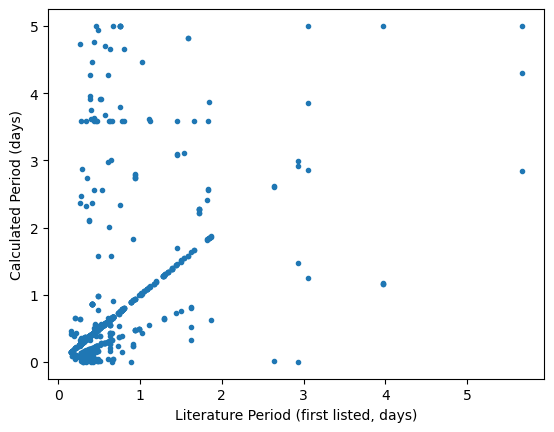

In [9]:
plt.scatter(merged.per,merged.calc_per,marker='.')
plt.xlabel('Literature Period (first listed, days)')
plt.ylabel('Calculated Period (days)')
plt.show()

In [26]:
np.sum(np.isclose(merged.per2,merged.calc_per,rtol=0.1))

96

In [28]:
np.sum(np.isclose(merged.per,merged.calc_per,rtol=0.1))

680

In [34]:
np.sum(np.logical_not(np.logical_or(np.isclose(merged.per,merged.calc_per,rtol=0.1),np.isclose(merged.per2,merged.calc_per,rtol=0.1))))

253

In [36]:
merged['not_close']=np.logical_not(np.logical_or(np.isclose(merged.per,merged.calc_per,rtol=0.1),np.isclose(merged.per2,merged.calc_per,rtol=0.1)))

In [40]:
np.unique(merged[merged.not_close==True].author_x,return_counts=True)

(array(['EVEREST', 'FFI', 'K2SFF', 'SPOC'], dtype=object),
 array([ 43, 128,  11,  71]))